# Youtube Text Data Analysis

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Sentiment Analysis on comments

In [2]:
com = pd.read_csv('GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
com.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [4]:
#for sentiment analysis of texts we need textbook library which can be downloaded using command "pip install textblob"
from textblob import TextBlob

In [5]:
#we have to find polarity of all the comments to determine whether they are positive or negative, and for this purpose we can use the following command
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [6]:
#checking null values in dataframe.
com.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [7]:
#There are few null values in column 'comment_text' which needs to be removed.
com.dropna(inplace=True)

In [8]:
polarity =[]

for i in com['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)        

In [9]:
com['polarity'] = polarity

In [10]:
com.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


#### EDA on positive sentences

In [11]:
com_pos = com[com['polarity'] == 1]

In [12]:
com_pos.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [13]:
com_pos.shape

(20400, 5)

In [14]:
com_pos.reset_index()

,index,video_id,comment_text,likes,replies,polarity
0,4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
1,26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
2,80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
3,158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
4,175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0
...,...,...,...,...,...,...
20395,718390,lLN1FwiqGwc,I'm just stopping the video three minutes in t...,0,0,1.0
20396,718416,lLN1FwiqGwc,Beating up tommy wiseu was the best part of th...,0,0,1.0
20397,718432,lLN1FwiqGwc,kudos for the mtg cards :D,0,0,1.0
20398,718440,lLN1FwiqGwc,Tommy Wiseau is my greatest fear,0,0,1.0


In [15]:
#Examples of stopwords are he,she,it,that etc. and they are of no use to analysis, so we need to remove them by using this library.
from wordcloud import WordCloud,STOPWORDS

In [16]:
sw = set(STOPWORDS)

In [17]:
total_com_pos = ''.join(com_pos['comment_text'])

In [18]:
wordcloud_pos = WordCloud(width=1000,height = 500,stopwords = sw).generate(total_com_pos)

(-0.5, 999.5, 499.5, -0.5)

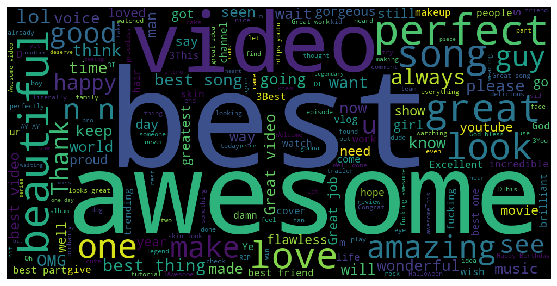

In [19]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_pos)
plt.axis('off')

#### EDA on negative sentences

In [20]:
com_neg = com[com['polarity'] == -1]

In [21]:
com_neg.shape

(3339, 5)

In [22]:
com_neg.reset_index()

,index,video_id,comment_text,likes,replies,polarity
0,1387,ql0Op1VcELw,boring,0,0,-1.0
1,1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1,1,-1.0
2,1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
3,1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1,0,-1.0
4,1793,F2uJvwiSZAQ,Thats insane.,0,0,-1.0
...,...,...,...,...,...,...
3334,717296,t8sgy0faXyg,Terrible,0,0,-1.0
3335,717668,LunHybOKIjU,this is terrible em you are 50,0,0,-1.0
3336,717716,AUP3uhrM19c,Not a penalty terrible decision!!,0,0,-1.0
3337,717903,8pHPohFezIk,Hazard was terrible,0,0,-1.0


In [23]:
total_com_neg = ''.join(com_neg['comment_text'])

In [24]:
wordcloud_neg = WordCloud(width=1000,height = 500,stopwords = sw).generate(total_com_neg)

(-0.5, 999.5, 499.5, -0.5)

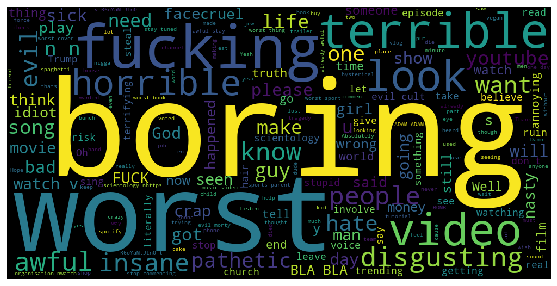

In [25]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_neg)
plt.axis('off')

### Analyzing tags of the videos

In [26]:
vids = pd.read_csv('GBvideos.csv',error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [27]:
vids.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


In [28]:
vids['tags']

0       apple events|apple event|iphone 8|iphone x|iph...
1       this morning|interview|holly willoughby|philli...
2       emmablackery|emma blackery|emma|blackery|briti...
3       skit|korean|language|conversation|esl|japanese...
4       sprinkleofglitter|sprinkle of glitter|baby gli...
                              ...                        
7988    eminem|freestyle|bet|rage against the machine|...
7989    Today's Video|Today Video|Latest News|Last|New...
7990    essiebutton|Estée Lalonde|Estee Lalonde|Essie ...
7991    hey ya cover|amazing cover|Shape of You Walk o...
7992    channel awesome|nostalgia critic|doug walker|m...
Name: tags, Length: 7993, dtype: object

In [29]:
tot_tags = ' '.join(vids['tags'])

In [30]:
tot_tags

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11 this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David

In [31]:
#There is a chance for having special characters in the tags which is not useful for us. So lets remove them using following library
import re

In [32]:
tags=re.sub('[^a-zA-Z]',' ',tot_tags)

In [33]:
 tags

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [34]:
#There are some extra spaces in the tags, which needs to be removed.
tags = re.sub(' +',' ',tags)

In [35]:
tags_wc = WordCloud(width = 1000, height =500,stopwords=sw).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

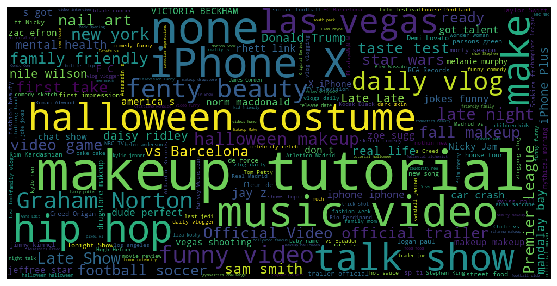

In [36]:
plt.figure(figsize=(15,5))
plt.imshow(tags_wc)
plt.axis('off')

### Analyzing reactions(likes,dislikes,views) of videos and how are they co-related with each other

Text(0.5, 1.0, 'Views vs Likes')

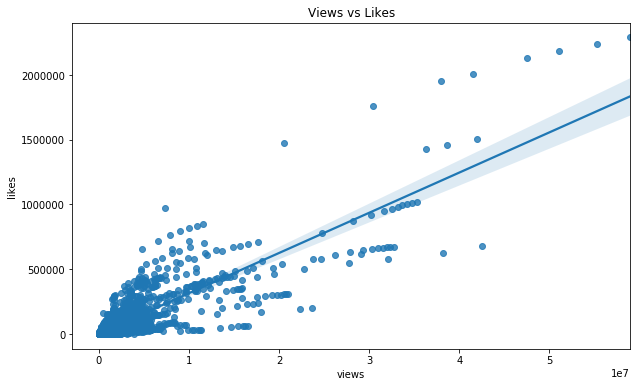

In [37]:
plt.figure(figsize=(10,6))
sns.regplot(data=vids,x='views',y='likes')
plt.title('Views vs Likes')

From the above, we can tell that as number of views increases, number of likes will also increase

Text(0.5, 1.0, 'Views vs Dislikes')

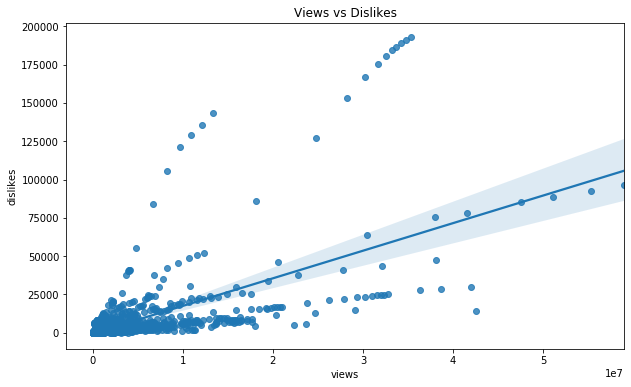

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(data=vids,x='views',y='dislikes')
plt.title('Views vs Dislikes')

From the above, we can tell that, as Views are increasing, number of dislikes are also increasing but not that much compared to likes

In [39]:
df_corr = vids[['views','likes','dislikes']]

In [40]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.866249,0.671703
likes,0.866249,1.000000,0.623797
dislikes,0.671703,0.623797,1.000000


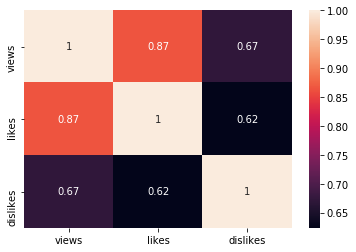

In [41]:
sns.heatmap(df_corr.corr(),annot=True)